# A Primer on Monte Carlo Methods
## Andrew R Garcia, 2019

_Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at_

http://www.apache.org/licenses/LICENSE-2.0
_Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License._

##### Table of Contents  
- [What are Monte Carlo methods?](#What-are-Monte-Carlo-methods?)  
- [Simple Monte Carlo](#Simple-Monte-Carlo)  
    * [Example: Monte Carlo Simulations for Six Sigma Process Control](#Monte-Carlo-Simulations-for-Six-Sigma-Process-Control:-Taffy-Making-Machine)
- [Metropolis Monte Carlo](#Metropolis-Monte-Carlo)  
    * [The probability of transition](#The-probability-of-transition)
    * [The rejection sampling criterion](#The-rejection-sampling-criterion)
    * [Example: Atoms in Excited States at Different Temperatures](#Atoms-in-Excited-States-at-Different-Temperatures)


### What are Monte Carlo methods?

Monte Carlo (MC) methods are, typically, computational algorithms which can be used to predict the parameters of a certain event or properties correlated thereof, which tend to relate on the likelihood of these event's occurence.

Thus, MC methods can indirectly predict a property of a feature which is correlated to a certain event, as is the popular example for estimating the value of $\pi$ from the random sampling of points from the area of a circle enclosed by a square (https://academo.org/demos/estimating-pi-monte-carlo/)

### Simple Monte Carlo
**Estimating the standard deviation or spread of an independent variable**

In the purest sense, MC methods involve sampling from random distributions. We can use python to specify which distribution to draw samples from, though one can also use a specific probability density function (PDFN) were python not able to have the specified PDFN available. 

This sampling can be done easily with python's **numpy.random** module. Obviously enough, were we to sample enough points from a random distribution, we would form said distribution:

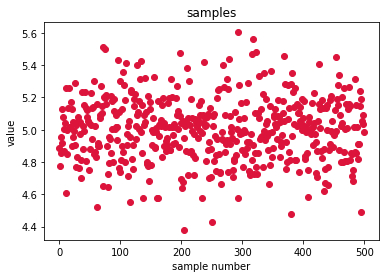

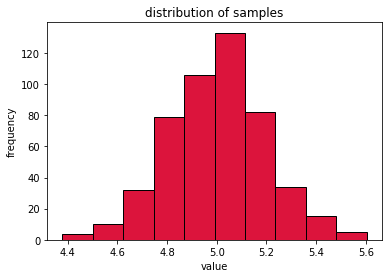

In [27]:
import random
import matplotlib.pyplot as plt

sampleno = 500
mean, sd = 5, 0.2 
k, x = 0, []
while k < sampleno: x.append(random.gauss(mean, sd)); k+=1

plt.figure()
plt.plot(x,'o',color='crimson'), plt.title('samples'), plt.xlabel('sample number'), plt.ylabel('value')
plt.show()
plt.figure()
plt.hist(x,color='crimson',edgecolor='k'), plt.title('distribution of samples'), plt.xlabel('value'), plt.ylabel('frequency')
plt.show()


Now, let's say for simplicity we studying a variable which we know is a linear combination of two dependent variables X1 and X2:

$Y = C_1 X_1 + C_2 X_2$

Here we assume the coefficients $C_i$ have already been determined. Let's continue with a real world example:

#### Monte Carlo Simulations for Six Sigma Process Control: Taffy Making Machine

Let's assume we have a taffy making machine and want to estimate the *'softness'* of our candy ($Y$) from the  amount of salt added ($X_1$) and the calender speed ($X_2$) . Knowing our machine, the calender speed is not completely steady; it oscillates exactly $\pm$ 10 speed units from its input. There is also some human error in how much salt is added per batch, and from such we have estimated a standard deviation. 

Nonetheless, we have also performed a fit and found the coefficients for X1 and X2 to appropriately correlate them with Y. Thus, our system is defined the following way: 

$Y = 0.6 X_1 + 1.4 X_2$

$Y$: Softness

$X_1$: Amount of salt - Gaussian distribution;  $\sigma_1$ = 3

$X_2$: Calender speed - Uniform distribution; $Range$ = [a,b]   ;   {a,b} = <$X_2$> $\pm$ 10  

With this information we can estimate the statistical distribution of our output (candy softness) for any input value with a simple MC algorithm:

1) A sample from $X_1$'s distribution is chosen <br/>
2) A sample from $X_2$'s distribution is chosen <br/>
3) These two samples are operated with the function for $Y$ above <br/>
4) 1-3 is repeated N times to form a distribution for $Y$ 

This can be easily automated with python adapting the previous script shown here:

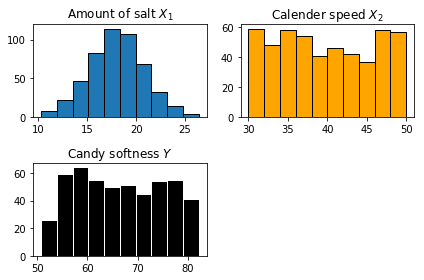

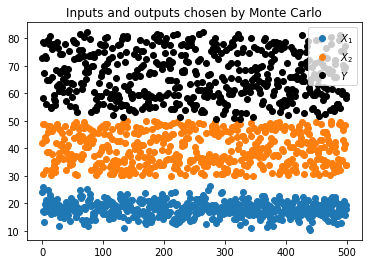

In [15]:
import numpy as np
def distgen(sampleno,dist_type,param1, param2):
    k, x = 0, []
    while k < sampleno: x.append(dist_type(param1,param2)); k+=1
    return np.array(x)

X1 = distgen(500,random.gauss,18, 3)
X2 = distgen(500,random.uniform,30, 50)

C1, C2 = 0.6,1.4
Y = C1*X1 + C2*X2

fig = plt.figure()
plt.subplot(2, 2, 1)
plt.title('Amount of salt $X_1$')
plt.hist(X1,edgecolor='k')
plt.subplot(2, 2, 2)
plt.title('Calender speed $X_2$')
plt.hist(X2,color='orange',edgecolor='k')
plt.subplot(2, 2, 3)
plt.title('Candy softness $Y$')
plt.hist(Y,color='k',edgecolor='w')
fig.tight_layout()
plt.show()

plt.title('Inputs and outputs chosen by Monte Carlo')
plt.plot(X1,'o',label='$X_1$'),plt.plot(X2,'o',label='$X_2$')
plt.plot(Y,'ko',label='$Y$'),plt.legend()
plt.show()


If we assume the distribution of $Y$ is Gaussian, then the center and spread parameters are simply normal mean and standard deviation, respectively, and can be calculated easily:

In [3]:
print('mean',np.mean(Y))
print('sdev',np.std(Y))

mean 66.87506957129455
sdev 7.919312596537991


Otherwise, we can then fit the $Y$ distribution to a probability density function (PDFN) and get the parameters thereof (e.g. mean, spread, kurtosis, etc..). We can load **pdsfit.py** from my **/statistics** repository to do so (see ***/statistics/pdsfit_tutorial*** to learn more) :


Candy softness (Y)
normal_mean 66.87506957129455
normal_sdev 7.919312596537991

Candy softness (Y)
lognorm_s/sigma 0.01400124932305721
lognorm_loc -499.8976860610304
lognorm_scale/median/exp_mean 566.7204096666744

Candy softness (Y)
beta_a 1.9199678251538828
beta_b 1.9324035401570503
beta_c 49.71611030199574
beta_d 34.340118678024574


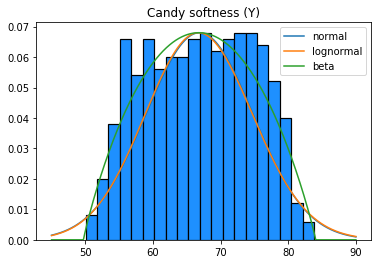

(['normal_mean',
  'normal_sdev',
  'lognorm_s/sigma',
  'lognorm_loc',
  'lognorm_scale/median/exp_mean',
  'beta_a',
  'beta_b',
  'beta_c',
  'beta_d'],
 [66.87506957129455,
  7.919312596537991,
  0.01400124932305721,
  -499.8976860610304,
  566.7204096666744,
  1.9199678251538828,
  1.9324035401570503,
  49.71611030199574,
  34.340118678024574])

In [8]:
from pdsfit import *
make(Y,'Candy softness (Y)',['gauss','lognorm','beta'],bins=20,xlims='')

One can see the mean and standard deviation obtained from numpy are the same as those obtained from a Gaussian fit of the generated $Y$ data.

### Metropolis Monte Carlo

A subset of Markov Chain Monte Carlo (MCMC) techniques, this method was [for the most part] developed by Nicholas Metropolis in the 1940s for the Manhattan Project to calculate neutron transport rates in various materials and thus predict the explosive behavior of various fission weapons being designed at the time. 

It is a powerful statistical analysis algorithm which can make good estimates on the equilibrium properties of a physical system by generating random configurations sampled from the system's corresponding statistical mechanics distribution. Though time cannot be accounted in a completely deterministic way, one can use MMC to study the evolution of a particular system. 

#### The probability of transition

Let's define a system with two energies, a ground state $E_g$ and an excited state $E_e$, where $E_e$ > $E_g$. 

Assuming we place a particle in the ground state, we let the system have 4 probabilties: 

$P(g)$ = probability of finding a particle in the ground state

$P(e)$ = probability of finding a particle in the excited state

$P_g(e)$ = probability of transition to the excited state

$P_e(g)$ = probability of transition to the ground state

The probability of finding the particle in either of these states ($P(e)$ or $P(g)$) can be represented by defining the aforementioned probability using the canonical ensemble:

$P_g$ =  $Q^{-1}$ $e^{E_g/k_B T}$

and thus, we vanish the partition function by taking the ratio thereof:

$P_e$/$P_g$ = $e^{\Delta E/k_B T}$

We can apply Bayes theorem and, consequently, the principle of microscopic reversibility to derive an expression for the probability of transition to the excited state:

$P_g(e)$ $P(e)$ = $P_e(g)$ $P(g)$

Then substituting into the ratio of probabilities, 

$P_g(e)$ / $P_e(g)$ =  $e^{\Delta E/k_B T}$

Defining the system to ALWAYS go to ground state from excited state ($P_e(g)$ = 1):


$P_g(e)$ =  $e^{\Delta E/k_B T}$

#### The rejection sampling criterion

A Metropolis Monte Carlo simulation evaluates whether or not the transition occurs by checking if said probability is higher than a random number between 0 and 1:

- if $e^{\Delta E/k_B T}$ > random.uniform(0,1)
      accept transition
- else 
      reject


The rationale behind this criterion lies in an infinite sampling of random particles from 0-1 below the new distribution (ratio of two distributions) approaching the area thereof, i.e. its cumulative density function. I simulate this graphically using the script below:

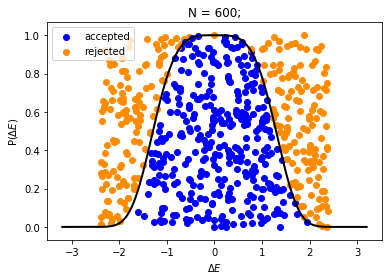

In [28]:
import random as ran
import numpy as np
import matplotlib.pyplot as plt

#function for a Gaussian
def pdf(x,sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp((-x**2)/(2*sigma)**2)

#E as a function of x
def Ei(x):
    return (1/np.pi)*(x)**2

def accrej(n):
    
    #plot a Gaussian with the following parameters:
    sigma, x_e = 0.5, np.linspace(-4,4,500)
    
    x_g = x_e/5 
    
    P = pdf(Ei(x_e),sigma) / pdf(Ei(x_g),sigma)

    plt.figure()
    plt.ylabel('P($\Delta E$)')
    plt.xlabel('$\Delta E$')
    plt.plot(x_e-x_g,P,linewidth=2,color='k')
    
    
    #the rejection sampling algorithm explained graphically
    k=0  
    while k < n:
        xs, ys = ran.uniform(-3,3), ran.uniform(0,1)
        xs_g = xs/5
        Pxs = pdf(Ei(xs),sigma) / pdf(Ei(xs_g),sigma)
        [plt.scatter(xs-xs_g,ys,color='b') if Pxs > ys else plt.scatter(xs-xs_g,ys,color='darkorange')]
        plt.title('N = {};'.format(k+1))
        k+=1
        
    plt.scatter(0,0,color='b', label='accepted'), plt.scatter(0,1,color='darkorange',label='rejected')
    plt.legend()
    plt.show()

accrej(600)


#### Atoms in Excited States at Different Temperatures

In this example I use Metropolis Monte Carlo to "simulate" the particles in ground and excited states at different temperatures for a given value of $\Delta E$. Ground and excited states are defined in the below plots as 0 and 1, respectively.

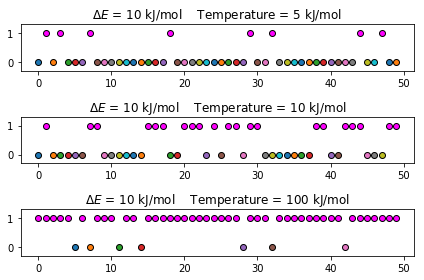

In [22]:
import numpy as np
import random as ran
import matplotlib.pyplot as plt

def P(dE,kBT):
    return np.exp(-dE/kBT) 

def atoms(N,dE,kBT):
    k = 0
    while k < N:
        dE_fluc = ran.gauss(dE,0.001)
        [plt.plot(k,1,'o',color='magenta', markeredgecolor='k') if P(dE_fluc,kBT) > ran.uniform(0,1) \
                  else plt.plot(k,0,'o', markeredgecolor='k')]
        k+=1
    plt.ylim(-0.3,1.3)
    plt.title('$\Delta E$ = {} kJ/mol    Temperature = {} kJ/mol'.format(np.round(dE,2),kBT))
    #plt.show()
    
N=50
dE = 10
#generate initial ground states for N atoms
state = np.zeros(N)

#plotting
fig = plt.figure()
plt.subplot(3, 1, 1)
atoms(N,dE,5)
plt.subplot(3, 1, 2)
atoms(N,dE,10)
plt.subplot(3, 1, 3)
atoms(N,dE,100)

fig.tight_layout()
plt.show()

Obvious as it may be, the script shows how higher temperatures make the transition to the excited state more likely. 